In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel

# Step 1: Load Dataset
file_path = "taxi_trip_pricing.csv"
df = pd.read_csv("/content/drive/MyDrive/FinalAssesment_AI/taxi_trip_pricing.csv")

In [20]:
# Step 2: Dataset Overview
print("Dataset Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB

First 5 rows:
   Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
0             19.35     Morning     Weekday              3.0   
1       

In [21]:
# Step 3: Data Cleaning (Handling Missing Values)
df = df.dropna(subset=["Trip_Price"])
median_price = df["Trip_Price"].median()
df["Price_Category"] = np.where(df["Trip_Price"] > median_price, 1, 0)
df = df.drop(columns=["Trip_Price"])
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-21-9ea761bd249a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price_Category"] = np.where(df["Trip_Price"] > median_price, 1, 0)
<ipython-input-21-9ea761bd249a>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-

In [22]:
# Step 4: Encode Categorical Features
label_encoders = {}
categorical_columns = ["Time_of_Day", "Day_of_Week", "Traffic_Conditions", "Weather"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

<ipython-input-23-d3dd74c9ff38>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Price_Category"], palette="coolwarm")


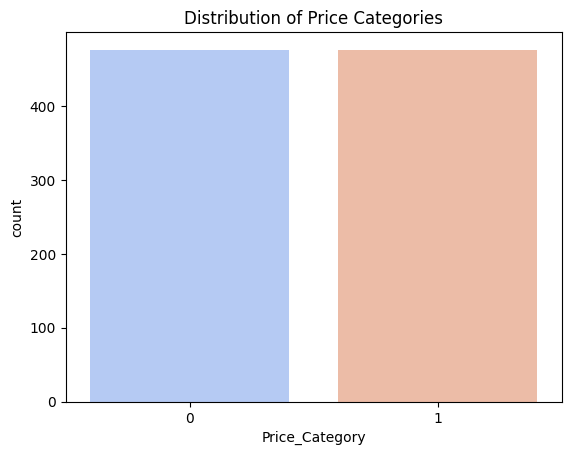

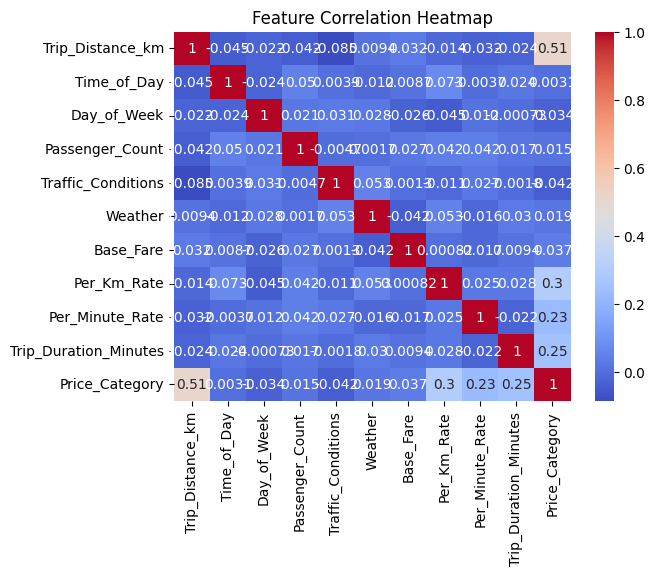

In [23]:
# Step 5: EDA - Visualization
sns.countplot(x=df["Price_Category"], palette="coolwarm")
plt.title("Distribution of Price Categories")
plt.show()
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [24]:
# Step 6: Prepare Data for Model Training
X = df.drop(columns=["Price_Category"])
y = df["Price_Category"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
# Step 7: Implement Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.epochs):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return [1 if p > 0.5 else 0 for p in predictions]

log_reg_scratch = LogisticRegressionScratch()
log_reg_scratch.fit(X_train, y_train)
y_pred_scratch = log_reg_scratch.predict(X_test)
print("Accuracy (Logistic Regression Scratch):", accuracy_score(y_test, y_pred_scratch))


Accuracy (Logistic Regression Scratch): 0.900523560209424


In [26]:
# Step 8: Train Two ML Models
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.9057591623036649
Random Forest Accuracy: 0.9109947643979057


In [27]:
# Step 9: Hyperparameter Optimization
param_grid_log_reg = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_log_reg = GridSearchCV(LogisticRegression(), param_grid_log_reg, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train, y_train)

param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Params (Logistic Regression):", grid_log_reg.best_params_)
print("Best Params (Random Forest):", grid_rf.best_params_)


Best Params (Logistic Regression): {'C': 1, 'solver': 'liblinear'}
Best Params (Random Forest): {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [29]:
# Step 10: Feature Selection
selector = SelectFromModel(grid_rf.best_estimator_, prefit=True)
X_selected = selector.transform(X_train)
X_selected_test = selector.transform(X_test)

In [30]:
# Step 11: Final Model Training
final_rf = RandomForestClassifier(**grid_rf.best_params_, random_state=42)
final_rf.fit(X_selected, y_train)
y_final_pred = final_rf.predict(X_selected_test)
print("Final Model Accuracy:", accuracy_score(y_test, y_final_pred))

Final Model Accuracy: 0.9214659685863874
